# Lending Club Case Study

-   ## Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.In this case, the customers labelled as 'charged-off' are the 'defaulters'.
- ## The objective of the case study would be to identify the risky loan applicants and hence reducing the credit loss and also will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.


In [1]:
## importing required libraries for the Project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings


## Setting Warning messages to Ignore and Row & Column display setting for panda dataframes

In [2]:
## Setting Warning messages to Ignore
warnings.filterwarnings('ignore')

# Setting max rows & columns settings to display
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 50)

## Printing the versions of Python Libraries used:

In [3]:
print("Numpy Version used: ",np.__version__)
print("Pandas Version used: ",pd.__version__)
print("Matplotlib Version used: ",matplotlib.__version__)
print("seaborn Version used: ",sns.__version__)

Numpy Version used:  1.18.1
Pandas Version used:  1.1.5
Matplotlib Version used:  3.5.3
seaborn Version used:  0.12.2


## 1) Data Loading ::
## Reading the loan dataset csv file


In [4]:
## Reading the loan dataset csv file
loan_data_df = pd.read_csv("loan.csv")

## 2) Exploring the data to find anomalies and patterns from initial investigations

In [5]:
## Exploring the data to find anomalies and patterns from initial investigations


In [6]:
loan_data_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,

In [7]:
##Checking the size of the dataset provided
loan_data_df.shape

(39717, 111)

In [8]:
##Checking the presence of fields with all null values
loan_data_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## 3) Data Cleaning :

## Drop the fileds with all null values

In [9]:
##Drop the fileds with all null values
loan_data_df.dropna(axis = 1, how = 'all', inplace = True)


In [10]:
##Checking the updated data
loan_data_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## Column with Single values can also be ignored as they can't contribute much for our analysis.

In [11]:
## Column with Single values can also be ignored as they can't contribute much for our analysis.
loan_data_df.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)


In [12]:
loan_data_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [13]:
loan_data_df.shape

(39717, 48)

### We have our dataset available for analysis with 39717 x 48 data.

 For our analysis, we would need the data which are not current i.e- Fully Paid or Charged Off.
 
 Hence, we will truncate the data which are currently running *(loan_status='Current')*




In [14]:
loan_data_df = loan_data_df[loan_data_df.loan_status != "Current"]

In [15]:
##Checking the differnt 
loan_data_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [16]:
loan_data_df.shape

(38577, 48)

### We have our dataset available for analysis with 38577 x 48 data. 
### We have removed records where the Loan is still Active, 1140 records were removed.

### Let's analyze further to remove any columns which won't be requied for our further analysis :

- Columns "id","url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state", "member_id" can be safely removed.
- "desc" column has text, removing it.
- "funded_amnt_inv" can be used instead of "funded_amnt", hence removing the later.
- "out_prncp_inv" & "total_pymnt_inv" can be removed as well as they won't help much in our analysis.

In [17]:
##Dropping the non-required fields :
loan_data_df.drop(["id", "member_id", "url", "title", "emp_title", "zip_code","addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "last_credit_pull_d", "delinq_2yrs", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"], axis = 1, inplace = True)

In [18]:
loan_data_df.shape

(38577, 21)

  ### We have the new dataset available for analysis with 38577 x 21 data.

## Checking for missing values & Standardizing any non-standard values :



In [19]:
## Checking null values and sorting them
loan_data_df.isna().sum().sort_values(ascending=False)

emp_length             1033
revol_util               50
total_acc                 0
annual_inc                0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
loan_amnt                 0
dtype: int64

In [20]:
## Checking null values and sorting them
impute_df=loan_data_df[["emp_length","revol_util"]]

In [21]:
impute_df.head()

,emp_length,revol_util
0,10+ years,83.70%
1,< 1 year,9.40%
2,10+ years,98.50%
3,10+ years,21%
5,3 years,28.30%


In [22]:
impute_df.describe()

,emp_length,revol_util
count,37544,38527
unique,11,1088
top,10+ years,0%
freq,8488,954


In [23]:
impute_df.mode()

,emp_length,revol_util
0,10+ years,0%


In [24]:
##We will need to use the mode value for the imputation as mean or other stats won't be helpful here,
##also the number of records imputed is less which will make our analysis less prone to error due to the imputation
##As the above columns are containing nan or missing values, fixing tehm first before standardization


### Treating the missing values for "emp_length","revol_util" by imputing them

In [25]:
#Imputing the values for "revol_util" field
loan_data_df.dropna(axis=0,subset = ["revol_util"],inplace = True)

##Validating the data (if result=0, then successfull fil)
loan_data_df.revol_util.isna().sum()

0

In [26]:
#Imputing the values for "emp_length" field
loan_data_df.emp_length.fillna(loan_data_df.emp_length.mode()[0], inplace = True)

##Validating the data (if result=0, then successfull fil)
loan_data_df.emp_length.isna().sum()

0

## Standardizing the values :

#### Identifying columns requiring standardization

In [27]:
##Identifying columns requiring standardization
loan_data_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12


In [28]:
##Analyzing "int_rate" field
loan_data_df.int_rate

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38527, dtype: object

In [29]:
##Analyzing "emp_length" field
loan_data_df.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [30]:
##Analyzing "revol_util" field
loan_data_df.revol_util

0        83.70%
1         9.40%
2        98.50%
3           21%
5        28.30%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 38527, dtype: object

In [31]:
#Remove trailing % in 'revol_util'
loan_data_df['revol_util'] = pd.to_numeric(loan_data_df['revol_util'].str.rstrip('%'))


In [32]:
#Remove trailing % in 'int_rate'
loan_data_df['int_rate'] = pd.to_numeric(loan_data_df['int_rate'].str.rstrip('%'))

In [33]:
##Cleansing the "emp_length" field :
#             If emp_length<1 year then 0
#             Else If emp_length contains 10+ then make it 10
#             Else populate the actual values
loan_data_df['emp_length'] = loan_data_df['emp_length'].apply(lambda x: 0 if "<" in x else (int(x.split('+')[0]) if "+" in x else int(x.split()[0])))


In [34]:
loan_data_df.shape

(38527, 21)

In [35]:
loan_data_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


## Our cleansed data now contains 38527 x 21 data,
## We will proceed to analyze the data to solve the problem statement 

# Outlier Treatment


In [36]:
#Checking the key columns for outliers and treating them for better data analysis

In [37]:
loan_data_df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

In [38]:
loan_data_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


## We can perform the outlier treatment for the below mentioned fields :
### 'loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti'

<AxesSubplot:>

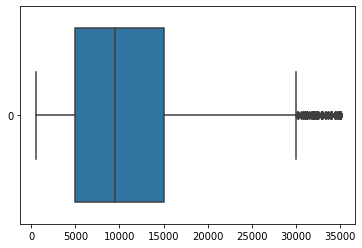

In [92]:
sns.boxplot(loan_data_df.loan_amnt, orient="h")

<AxesSubplot:>

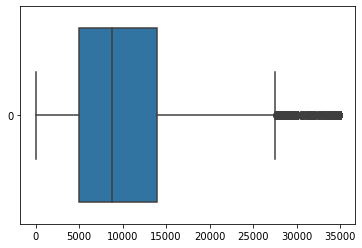

In [40]:
sns.boxplot(loan_data_df.funded_amnt_inv, orient="h")

<AxesSubplot:>

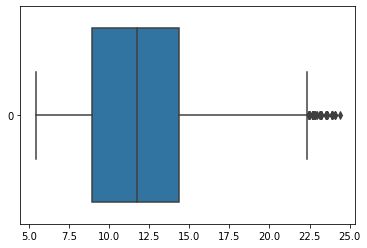

In [41]:
sns.boxplot(loan_data_df.int_rate, orient="h")

<AxesSubplot:>

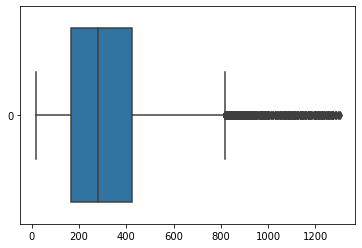

In [42]:
sns.boxplot(loan_data_df.installment, orient="h")

<AxesSubplot:>

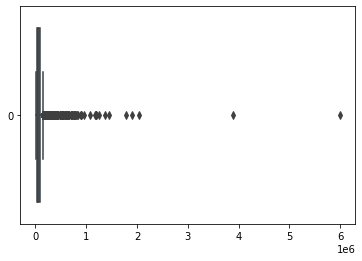

In [43]:
sns.boxplot(loan_data_df.annual_inc, orient="h")

<AxesSubplot:>

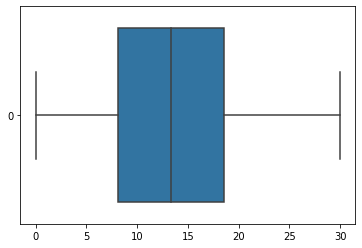

In [44]:
sns.boxplot(loan_data_df.dti, orient="h")

### As we can observe there is presence of outliers in some of the columns,
### we will analyze them further to make decisions on the outlier removal.

In [45]:
##Checking quantile values for loan_amnt in the data
quant_loan_amnt = loan_data_df.loan_amnt.quantile([0.25,0.5,0.75,0.90,0.95,0.96,0.97,0.98,0.99])
quant_loan_amnt

0.25     5325.0
0.50     9600.0
0.75    15000.0
0.90    21600.0
0.95    25000.0
0.96    25000.0
0.97    28000.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

#### Loan Amount field ("loan_amnt") doesn't need cleanup as values are quite continous

In [46]:
##Checking quantile values for funded_amnt_inv in the data
quant_funded_amnt_inv = loan_data_df.funded_amnt_inv.quantile([0.25,0.5,0.75,0.90,0.95,0.96,0.97,0.98,0.99])
quant_funded_amnt_inv

0.25     5000.000000
0.50     8750.000000
0.75    14000.000000
0.90    19975.000000
0.95    24506.582238
0.96    24950.000000
0.97    25828.061320
0.98    29890.414864
0.99    34721.583150
Name: funded_amnt_inv, dtype: float64

#### Funded Amount of Investors ("funded_amnt_inv") doesn't need cleanup as values are quite continous

In [47]:
##Checking quantile values for int_rate in the data
quant_int_rate = loan_data_df.int_rate.quantile([0.25,0.5,0.75,0.90,0.95,0.96,0.97,0.98,0.99])
quant_int_rate

0.25     8.94
0.50    11.71
0.75    14.35
0.90    16.82
0.95    18.30
0.96    18.67
0.97    19.29
0.98    19.91
0.99    20.90
Name: int_rate, dtype: float64

In [48]:
#### Intrest Rate ("int_rate") doesn't need cleanup as values are quite continous

<AxesSubplot:>

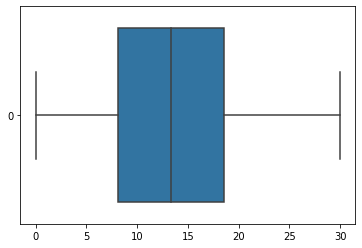

In [49]:
sns.boxplot(loan_data_df.dti, orient="h")

In [50]:
##Checking quantile values for dti in the data
quant_dti = loan_data_df.dti.quantile([0.25,0.5,0.75,0.90,0.95,0.96,0.97,0.98,0.99])
quant_dti

0.25     8.14
0.50    13.37
0.75    18.56
0.90    22.29
0.95    23.80
0.96    24.14
0.97    24.51
0.98    24.85
0.99    26.53
Name: dti, dtype: float64

#### DTI ("dti") doesn't need cleanup as values are quite continous

In [51]:
##Checking quantile values for annual_inc in the data
quant_annual_inc = loan_data_df.annual_inc.quantile([0.25,0.5,0.75,0.90,0.95,0.96,0.97,0.98,0.99])
quant_annual_inc

0.25     40000.0
0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.96    150000.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

#### Annual Income field ("annual_inc") would need cleanup as values are not continous post 95/96 %tile

In [52]:
##Removing the values greater than 96 %tile
quant_96_annual_inc = loan_data_df['annual_inc'].quantile(0.96)
loan_data_df = loan_data_df[loan_data_df.annual_inc <= quant_96_annual_inc]

<AxesSubplot:>

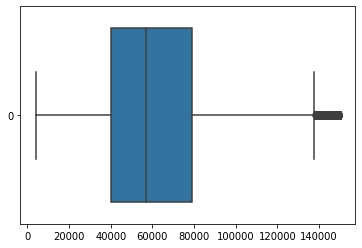

In [53]:
##Rechecking the "annual_inc" values after outlier removal
sns.boxplot(loan_data_df.annual_inc, orient="h")

### Now the data looks cleaners with less outliers for "annual_inc" field

In [54]:
def univariate_analysis(df, column):
    fig, p = plot.subplots(1,2, figsize=(16, 4))
    sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sea.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plot.tight_layout()
    plot.show()

# Quantitative Variable Analysis


### Univariate Analysis for : 'funded_amnt'

<AxesSubplot:xlabel='funded_amnt_inv'>

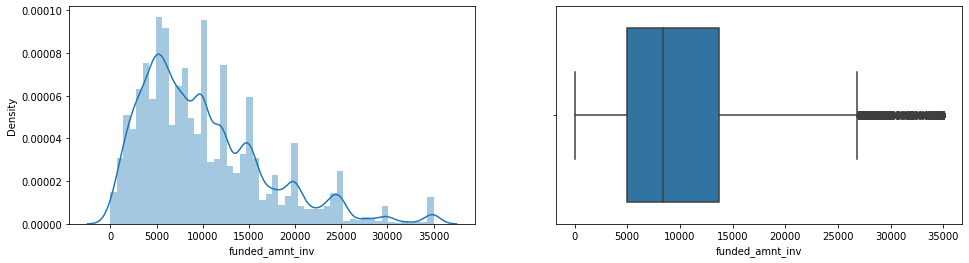

In [55]:
fig, p = plt.subplots(1,2, figsize=(16, 4))
sns.distplot(loan_data_df.loc[loan_data_df['funded_amnt_inv'].notnull(), 'funded_amnt_inv'], ax=p[0])
sns.boxplot(x='funded_amnt_inv', data=loan_data_df, ax=p[1])

#### We observe that most of the funded amount("funded_amnt_inv") lies between 5k to 15k

### Univariate Analysis for : 'loan_amnt'

<AxesSubplot:xlabel='loan_amnt'>

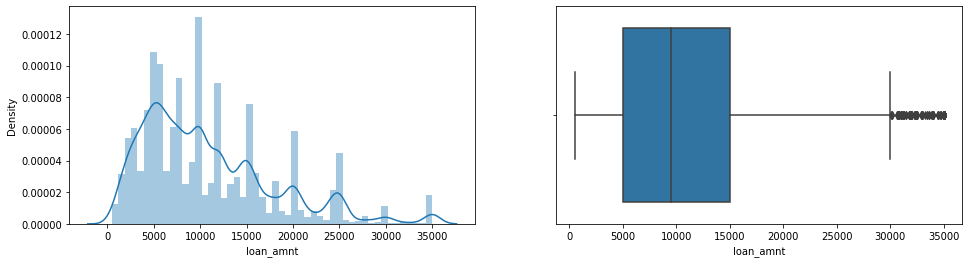

In [56]:
fig, p = plt.subplots(1,2, figsize=(16, 4))
sns.distplot(loan_data_df.loc[loan_data_df['loan_amnt'].notnull(), 'loan_amnt'], ax=p[0])
sns.boxplot(x='loan_amnt', data=loan_data_df, ax=p[1])

#### We observe that most of the loan amount("loan_amnt") lies between 5k to 15k

### Univariate Analysis for : 'int_rate'

<AxesSubplot:xlabel='int_rate'>

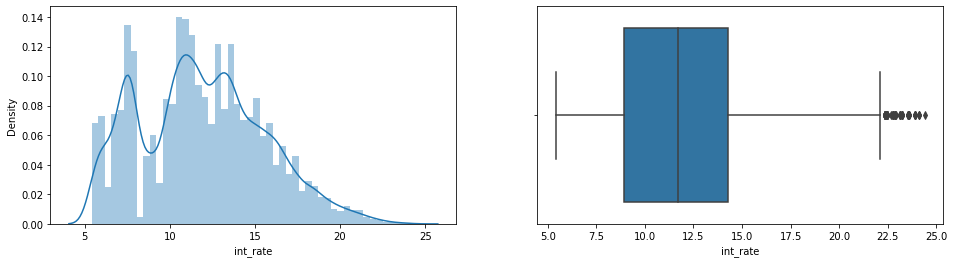

In [57]:
fig, p = plt.subplots(1,2, figsize=(16, 4))
sns.distplot(loan_data_df.loc[loan_data_df['int_rate'].notnull(), 'int_rate'], ax=p[0])
sns.boxplot(x='int_rate', data=loan_data_df, ax=p[1])

#### We observe that majority of interest rate("int_rate") lies between 7% to 18%, maximum capped at 25%(loan_data_df['int_rate'].max())

### Univariate Analysis for : 'installment'

<AxesSubplot:xlabel='installment'>

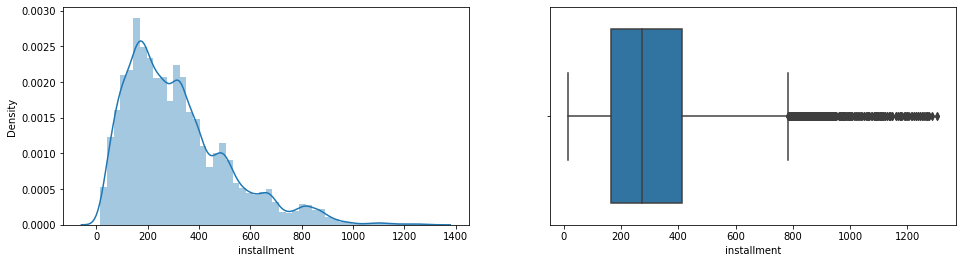

In [58]:
fig, p = plt.subplots(1,2, figsize=(16, 4))
sns.distplot(loan_data_df.loc[loan_data_df['installment'].notnull(), 'installment'], ax=p[0])
sns.boxplot(x='installment', data=loan_data_df, ax=p[1])

#### We observe that most of the installment amount("installment") lies between 100 to 500

### Univariate Analysis for : 'annual_inc'

<AxesSubplot:xlabel='annual_inc'>

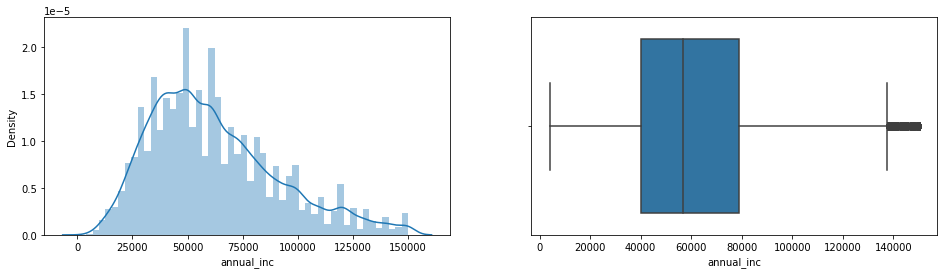

In [59]:
fig, p = plt.subplots(1,2, figsize=(16, 4))
sns.distplot(loan_data_df.loc[loan_data_df['annual_inc'].notnull(), 'annual_inc'], ax=p[0])
sns.boxplot(x='annual_inc', data=loan_data_df, ax=p[1])

#### We observe that the annual income ("annual_inc") lies between 30k to 80k

### Univariate Analysis for : 'dti'

<AxesSubplot:xlabel='dti'>

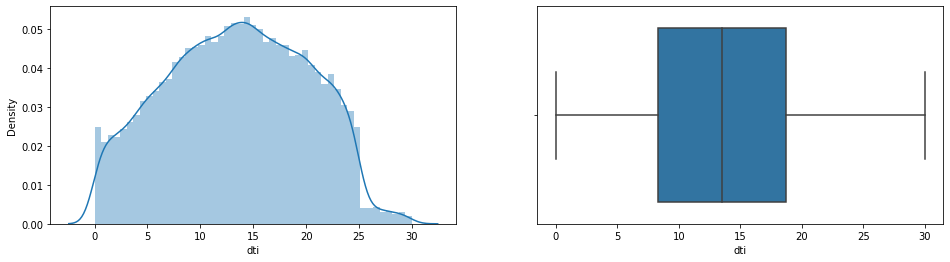

In [60]:
fig, p = plt.subplots(1,2, figsize=(16, 4))
sns.distplot(loan_data_df.loc[loan_data_df['dti'].notnull(), 'dti'], ax=p[0])
sns.boxplot(x='dti', data=loan_data_df, ax=p[1])

#### We observe thatthe dti ("dti") lies between 4 to 25

In [61]:
loan_data_df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

## Categorical Variable Analysis

### There are the following caegorical variables which should be analyzed :
   ####  home_ownership ,purpose , term, loan_status , grade, emp_length

### Analyzing column : "term"

<AxesSubplot:xlabel='term', ylabel='count'>

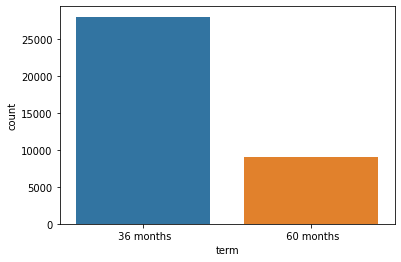

In [62]:
sns.countplot(x='term', data=loan_data_df)

### Majority of the defaults lied for 36months tenure

### Analyzing column : "home_ownership"

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

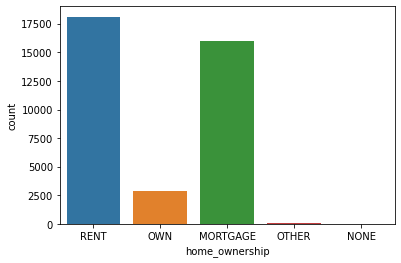

In [63]:
sns.countplot(x='home_ownership', data=loan_data_df)

### The above graph shows that most persons have secured loans for RENT & MORTGAGE

### Analyzing column : "purpose"

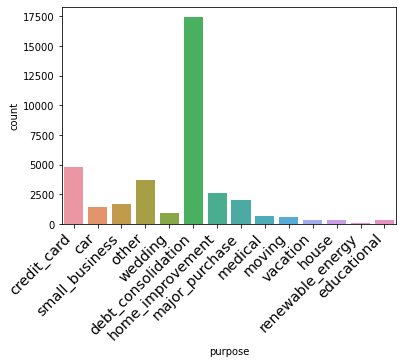

In [64]:
purpose_plt = sns.countplot(x='purpose', data=loan_data_df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

### The above graph shows that most persons have secured loans for debt_consolidation then credit_card

### Analyzing column : "loan_status"

<AxesSubplot:xlabel='loan_status', ylabel='count'>

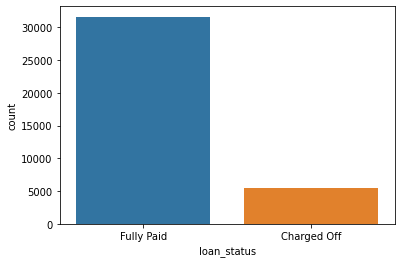

In [65]:
sns.countplot(x='loan_status', data=loan_data_df)

### The above graph shows that most persons that have secured loans have paid them fully and charged off rate is approximately 14-15%.

### Analyzing column : "grade"

<AxesSubplot:xlabel='grade', ylabel='count'>

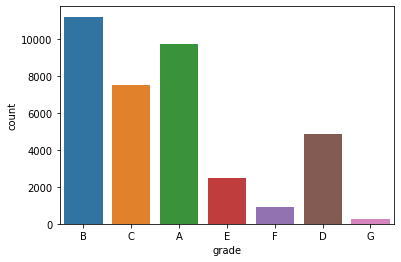

In [66]:
sns.countplot(x='grade', data=loan_data_df)

### The above graph shows that most persons that have secured loans have paid as *B, A & C* grade loans

### Analyzing column : "emp_length"

<AxesSubplot:xlabel='emp_length', ylabel='count'>

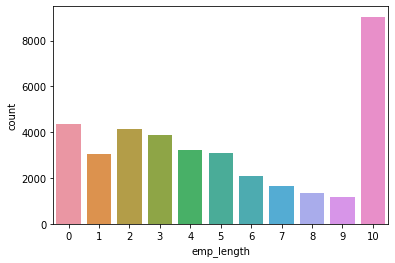

In [67]:
sns.countplot(x='emp_length', data=loan_data_df)

### The above graph shows that most persons that have secured loans are having employment length >=10 Years

### Deriving new fields for our analysis :
####     1) Year of loan disbursement
####     2) Month of disbursement
####     3) Monthly Income
####     4) Installment >= 30% of monthly income
####     5) Installment >= 45% of monthly income
####     6) Installment >= 60% of monthly income

####     1) Year of loan disbursement
######        issue year ('issue_y') = year(loan_data_df['issue_d'])

In [68]:
data=loan_data_df['issue_d'] = pd.to_datetime(loan_data_df['issue_d'], format='%b-%y')
loan_data_df['issue_y']=loan_data_df['issue_d'].dt.year

####     2) Month of loan disbursement
######        issue year ('issue_y') = month(loan_data_df['issue_d'])

In [69]:
loan_data_df['issue_m']=loan_data_df['issue_d'].dt.month

####     3) Monthly Income
######        Monthly Income = Annual Income/12

In [70]:
loan_data_df['monthly_inc']=loan_data_df['annual_inc']/12



####     4) Installment >= 30% of monthly income
####     5) Installment >= 45% of monthly income
####     6) Installment >= 60% of monthly income



In [71]:
loan_data_df['emi_gt_30_pct'] = (loan_data_df['installment'] / loan_data_df['monthly_inc'] ) > 0.3

In [72]:
loan_data_df['emi_gt_30_pct'].unique()

array([False,  True])

In [73]:
loan_data_df['emi_gt_45_pct'] = (loan_data_df['installment'] / loan_data_df['monthly_inc'] ) > 0.45

In [74]:
loan_data_df['emi_gt_45_pct'].unique()

array([False])

In [75]:
loan_data_df['emi_gt_60_pct'] = (loan_data_df['installment'] / loan_data_df['monthly_inc'] ) > 0.6

In [76]:
loan_data_df['emi_gt_60_pct'].unique()

array([False])

## Derived column analysis :





### Analyzing column : "issue_y"

<AxesSubplot:xlabel='issue_y', ylabel='count'>

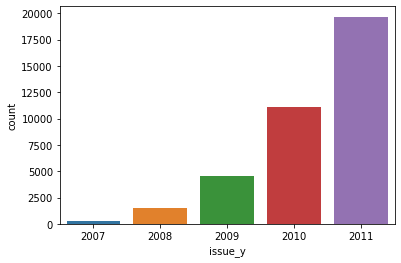

In [77]:
sns.countplot(x='issue_y', data=loan_data_df)

### The above graph shows that most persons that have secured loans in 2011 and the trend seems to be increasing year over year

### Analyzing column : "issue_m"



<AxesSubplot:xlabel='issue_m', ylabel='count'>

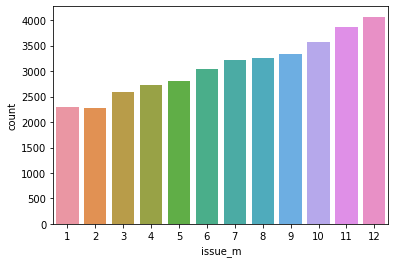

In [78]:
sns.countplot(x='issue_m', data=loan_data_df)

### The above graph shows that most persons that have secured loans post H2(2nd half of the Year).
#### Mostly the trend could be due to financial year closure in Q1 of year.

### Analyzing column : "monthly_inc"

In [79]:
loan_data_df['monthly_inc']

0        2000.000000
1        2500.000000
2        1021.000000
3        4100.000000
5        3000.000000
            ...     
39711    6250.000000
39712    9166.666667
39713    1500.000000
39714    8333.333333
39716    1833.333333
Name: monthly_inc, Length: 37042, dtype: float64

<AxesSubplot:xlabel='monthly_inc', ylabel='count'>

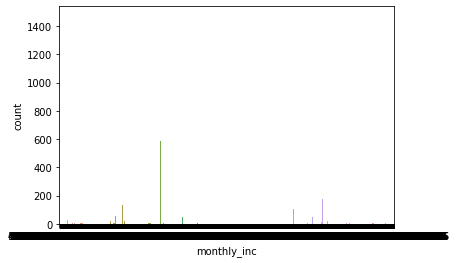

In [80]:
sns.countplot(x='monthly_inc', data=loan_data_df)

### The above graph shows that most persons that have secured loans have no significance to their monthly salaries

### Analyzing column : "emi_gt_30_pct"

<AxesSubplot:xlabel='emi_gt_30_pct', ylabel='count'>

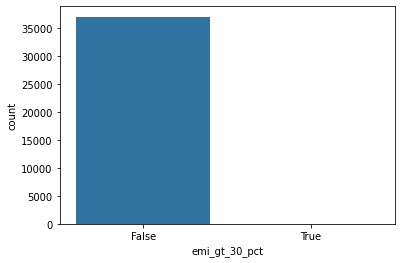

In [81]:
sns.countplot(x='emi_gt_30_pct', data=loan_data_df)

### The above graph shows that most persons that have secured loans have very less significance to their monthly emi > 30% of their monthly salary (for our dataset)

<AxesSubplot:>

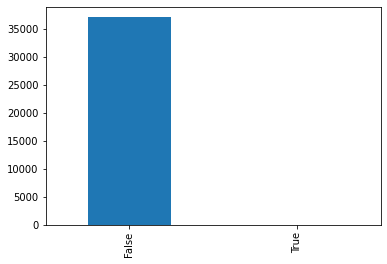

In [82]:
loan_data_df['emi_gt_30_pct'].value_counts().plot.bar()

### Analyzing column : "emi_gt_45_pct"

<AxesSubplot:xlabel='emi_gt_45_pct', ylabel='count'>

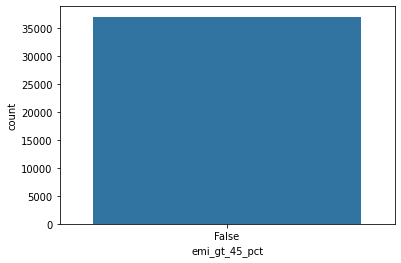

In [83]:
sns.countplot(x='emi_gt_45_pct', data=loan_data_df)

### The above graph shows that most persons that have secured loans have  no significance to their monthly emi > 45% of their monthly salary (for our dataset)

### Analyzing column : "emi_gt_60_pct"

<AxesSubplot:xlabel='emi_gt_60_pct', ylabel='count'>

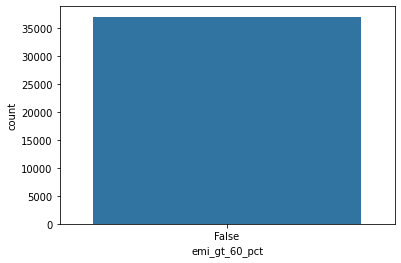

In [84]:
sns.countplot(x='emi_gt_60_pct', data=loan_data_df)

### The above graph shows that most persons that have secured loans have  no significance to their monthly emi > 60% of their monthly salary (for our dataset)